# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTING DATASET

In [ ]:
dataset = pd.read_csv("/content/delivery_time.csv")

In [ ]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [ ]:
dataset.columns = ['DeliveryTime', 'SortingTime']

#INDEPENDENT AND DEPENDENT VARIABLES

In [ ]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 0].values

In [ ]:
X

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [ ]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

#SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [ ]:
X_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [ ]:
X_test

array([10,  3,  5,  4,  4])

In [ ]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [ ]:
y_train

array([19.83, 12.03,  8.  , 19.  , 17.83, 29.  , 19.75, 15.35, 13.75,
       18.75,  9.5 , 18.11, 24.  , 21.  , 14.88, 16.68])

In [ ]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# ML ALGORITHMS - SIMPLE LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting the test 
y_pred = regressor.predict(X_test)

In [ ]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [ ]:
y_pred

array([23.97793478, 10.70456522, 14.49695652, 12.60076087, 12.60076087])

#FOR MEASURING THE ACCURACY

In [ ]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred= y_pred)

#squared True returns MSE  values, False returns RMSE values
mse = mean_squared_error(y_true = y_test, y_pred= y_pred) #default = True
rmse = mean_squared_error(y_true = y_test, y_pred= y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred= y_pred)
rsquare = r2_score(y_true = y_test, y_pred= y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 3.3252826086956517
MSE: 18.170114496691873
RMSE: 4.262641727461021
MAPE: 0.19464294628347842
Adj.Rsquare: -0.09171780724674217


#DATA VISUALISATION

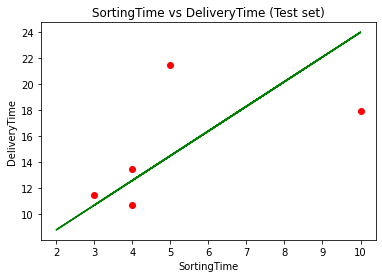

In [ ]:
# Visualizing the test set results
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('SortingTime vs DeliveryTime (Test set)')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')
plt.show()

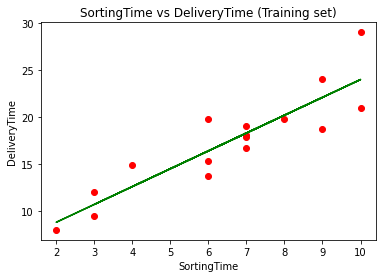

In [ ]:
#Visualizing the train set results
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('SortingTime vs DeliveryTime (Training set)')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')
plt.show()

#PREDICTION FOR A NEW DATAPOINT

In [ ]:
newdata = pd.Series([5, 8])
data_pred = pd.DataFrame(newdata, columns= ['Sorting Time'])

In [ ]:
data_pred

,Sorting Time
0,5
1,8


In [ ]:
regressor.predict(data_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([14.49695652, 20.18554348])

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

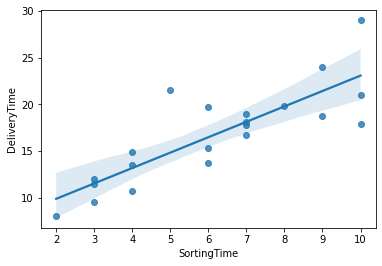

In [ ]:
sns.regplot(x=dataset['SortingTime'],y=dataset['DeliveryTime'])

# TRANSFORMATIONS

In [ ]:
data_log = np.log(dataset.iloc[:, 0])

In [ ]:
data_log

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: DeliveryTime, dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

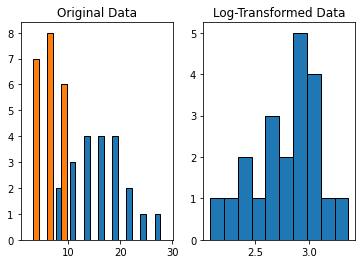

In [ ]:
# define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

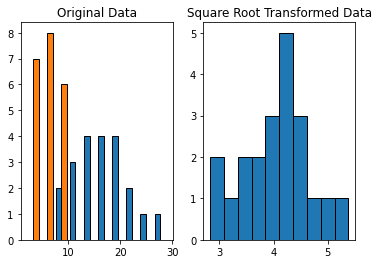

In [ ]:
#create square root log-transformed data
data_sqrt = np.sqrt(dataset.iloc[:, 0])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

Text(0.5, 1.0, 'Cube Root Transformed Data')

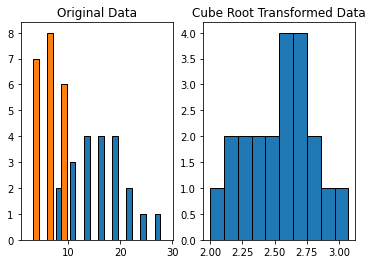

In [ ]:
#create cube root log-transformed data
data_cbrt = np.cbrt(dataset.iloc[:, 0])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#creating histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_cbrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

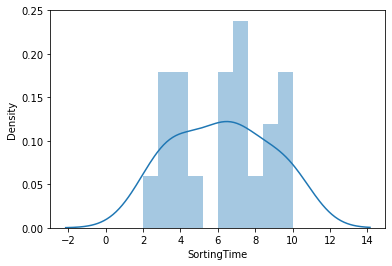

In [ ]:
sns.distplot(dataset['SortingTime'], kde = True, bins = 10)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

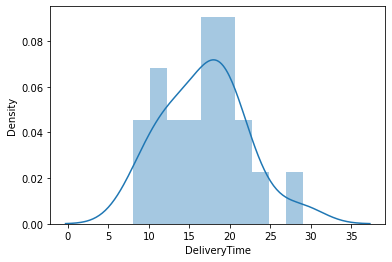

In [ ]:
sns.distplot(dataset['DeliveryTime'], kde = True, bins = 10)

# LOG TRANSFORMATION 

In [34]:
data_log1 = np.log(dataset)

In [35]:
data_log1

,DeliveryTime,SortingTime
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [36]:
X = data_log1.iloc[:, 1].values
y = data_log1.iloc[:, 0].values

In [93]:
X

array([1.32050048, 1.11502641, 1.21458124, 1.30004429, 1.32050048,
       1.21458124, 1.24845893, 1.03184584, 1.32050048, 1.30004429,
       1.27638661, 1.11502641, 1.24845893, 1.03184584, 1.03184584,
       1.11502641, 1.21458124, 1.24845893, 0.88499704, 1.24845893,
       1.17190231])

In [38]:
y

array([3.04452244, 2.60268969, 2.98315349, 3.17805383, 3.36729583,
       2.73111547, 2.94443898, 2.2512918 , 2.88480071, 2.93119375,
       2.98719594, 2.37490575, 2.8142104 , 2.44234704, 2.48740353,
       2.70001803, 2.62103882, 2.89646427, 2.07944154, 2.88088243,
       3.06805294])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [40]:
X_train

array([2.07944154, 1.09861229, 0.69314718, 1.94591015, 1.94591015,
       2.30258509, 1.79175947, 1.79175947, 1.79175947, 2.19722458,
       1.09861229, 1.94591015, 2.19722458, 2.30258509, 1.38629436,
       1.94591015])

In [41]:
X_test

array([2.30258509, 1.09861229, 1.60943791, 1.38629436, 1.38629436])

In [43]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
#Predicting the test 
y_pred = regressor.predict(X_test)

In [46]:
y_pred

array([3.14025852, 2.36721191, 2.69520272, 2.55192676, 2.55192676])

In [47]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred= y_pred)

#squared True returns MSE  values, False returns RMSE values
mse = mean_squared_error(y_true = y_test, y_pred= y_pred) #default = True
rmse = mean_squared_error(y_true = y_test, y_pred= y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred= y_pred)
rsquare = r2_score(y_true = y_test, y_pred= y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 0.1862454154079467
MSE: 0.04876691403339787
RMSE: 0.22083232107958714
MAPE: 0.06697706182496402
Adj.Rsquare: 0.2991622522257129


# SQRT TRANSFORMATION

In [66]:
data_sqrt1 = np.sqrt(data_log1)

In [67]:
data_sqrt1

,DeliveryTime,SortingTime
0,1.744856,1.517427
1,1.613285,1.177410
2,1.727181,1.338566
3,1.782710,1.482304
4,1.835019,1.517427
5,1.652609,1.338566
6,1.715937,1.394959
7,1.500431,1.048147
8,1.698470,1.517427
9,1.712073,1.482304


In [68]:
X = data_sqrt1.iloc[:, 1].values
y = data_sqrt1.iloc[:, 0].values

In [69]:
X

array([1.51742713, 1.17741002, 1.3385662 , 1.48230381, 1.51742713,
       1.3385662 , 1.39495883, 1.04814707, 1.51742713, 1.48230381,
       1.44202689, 1.17741002, 1.39495883, 1.04814707, 1.04814707,
       1.17741002, 1.3385662 , 1.39495883, 0.83255461, 1.39495883,
       1.26863624])

In [70]:
y

array([1.74485599, 1.61328537, 1.72718079, 1.78270969, 1.8350193 ,
       1.65260869, 1.71593676, 1.50043054, 1.69847011, 1.71207294,
       1.72835064, 1.54107292, 1.67756085, 1.56280102, 1.57715045,
       1.64317316, 1.61896227, 1.70190019, 1.44202689, 1.69731624,
       1.75158583])

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [72]:
X_train

array([1.44202689, 1.04814707, 0.83255461, 1.39495883, 1.39495883,
       1.51742713, 1.3385662 , 1.3385662 , 1.3385662 , 1.48230381,
       1.04814707, 1.39495883, 1.48230381, 1.51742713, 1.17741002,
       1.39495883])

In [73]:
X_test

array([1.51742713, 1.04814707, 1.26863624, 1.17741002, 1.17741002])

In [74]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [75]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
#Predicting the test 
y_pred = regressor.predict(X_test)

In [77]:
y_pred

array([1.76577974, 1.54199873, 1.64714125, 1.60363909, 1.60363909])

In [78]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred= y_pred)

#squared True returns MSE  values, False returns RMSE values
mse = mean_squared_error(y_true = y_test, y_pred= y_pred) #default = True
rmse = mean_squared_error(y_true = y_test, y_pred= y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred= y_pred)
rsquare = r2_score(y_true = y_test, y_pred= y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 0.05295379043127206
MSE: 0.0039759137538817576
RMSE: 0.06305484718783924
MAPE: 0.03182948465450511
Adj.Rsquare: 0.3809900628928743


# CUBE ROOT TRANSFORMATION

In [80]:
data_cbrt1 = np.cbrt(data_log1)

In [81]:
data_cbrt1

,DeliveryTime,SortingTime
0,1.449349,1.320500
1,1.375543,1.115026
2,1.439545,1.214581
3,1.470236,1.300044
4,1.498858,1.320500
5,1.397805,1.214581
6,1.433290,1.248459
7,1.310621,1.031846
8,1.423547,1.320500
9,1.431138,1.300044


In [82]:
X = data_cbrt1.iloc[:, 1].values
y = data_cbrt1.iloc[:, 0].values

In [83]:
X

array([1.32050048, 1.11502641, 1.21458124, 1.30004429, 1.32050048,
       1.21458124, 1.24845893, 1.03184584, 1.32050048, 1.30004429,
       1.27638661, 1.11502641, 1.24845893, 1.03184584, 1.03184584,
       1.11502641, 1.21458124, 1.24845893, 0.88499704, 1.24845893,
       1.17190231])

In [84]:
y

array([1.44934928, 1.37554287, 1.43954485, 1.4702361 , 1.49885777,
       1.39780532, 1.43329038, 1.31062142, 1.42354742, 1.43113798,
       1.44019479, 1.33418318, 1.41184013, 1.34669462, 1.3549255 ,
       1.39247975, 1.37876786, 1.42546336, 1.27638661, 1.42290262,
       1.45307361])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [86]:
X_train

array([1.27638661, 1.03184584, 0.88499704, 1.24845893, 1.24845893,
       1.32050048, 1.21458124, 1.21458124, 1.21458124, 1.30004429,
       1.03184584, 1.24845893, 1.30004429, 1.32050048, 1.11502641,
       1.24845893])

In [87]:
X_test

array([1.32050048, 1.03184584, 1.17190231, 1.11502641, 1.11502641])

In [88]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [90]:
#Predicting the test 
y_pred = regressor.predict(X_test)

In [91]:
y_pred

array([1.45960486, 1.33564935, 1.39579309, 1.37136916, 1.37136916])

In [92]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred= y_pred)

#squared True returns MSE  values, False returns RMSE values
mse = mean_squared_error(y_true = y_test, y_pred= y_pred) #default = True
rmse = mean_squared_error(y_true = y_test, y_pred= y_pred, squared = False)
mape = mean_absolute_percentage_error(y_true = y_test, y_pred= y_pred)
rsquare = r2_score(y_true = y_test, y_pred= y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Adj.Rsquare:", rsquare)

MAE: 0.029148585339856446
MSE: 0.0012206824346371423
RMSE: 0.03493826605080942
MAPE: 0.020771449628780143
Adj.Rsquare: 0.4043170977973477
